<a href="https://colab.research.google.com/github/RamcharanTeja64bit/Machine-Learning-Projects/blob/main/Image_Classification_Ramcharan_Teja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.44 s


In [25]:
!pip install bing-image-downloader

time: 2.44 s


In [26]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists
time: 118 ms


In [27]:
from bing_image_downloader import downloader
downloader.download("Ironaman",limit=30,output_dir='images',
                    adult_filter_off=True)
downloader.download("Spiderman",limit=30,output_dir='images',
                    adult_filter_off=True)
downloader.download("Hulk",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 13 Images on Page 1.


[%] Downloading Image #1 from http://icanbecreative.com/res/IronMan2/iron_man_2_imax_poster-normal.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.collectiondx.com/files/DYNAMITE_ACTION_TETSUJIN2-8_TAIYOUNOSHISHA_12_17CM_JAN2013_EVOLUTIONTOY_11340.jpg
[Error]Invalid image, not saving http://www.collectiondx.com/files/DYNAMITE_ACTION_TETSUJIN2-8_TAIYOUNOSHISHA_12_17CM_JAN2013_EVOLUTIONTOY_11340.jpg

[!] Issue getting: http://www.collectiondx.com/files/DYNAMITE_ACTION_TETSUJIN2-8_TAIYOUNOSHISHA_12_17CM_JAN2013_EVOLUTIONTOY_11340.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #2 from https://wallpapersite.com/images/wallpapers/spider-man-homecoming-2560x1440-iron-man-hd-4k-8k-7851.jpg
[!] Issue getting: https://wallpapersite.com/images/wallpapers/spider-man-homecoming-2560x1440-iron-man-hd-4k-8k-7851.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #2 from https://s1.cdn.aut

# Data preprocessing 

* Resizing the images

* Flattening the values of the image

In [30]:
#importing the required libraries
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['Ironman','Spiderman','Hulk']

for category in CATEGORIES:
  # Using Label Encoding to encode the values
  class_num = CATEGORIES.index(category) 
  # Create path to use all the images
  path = os.path.join(DATADIR,category) 
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) # Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 24.1 s


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 8.11 ms


# Plotting the count of Categories as a Bar plot

<BarContainer object of 3 artists>

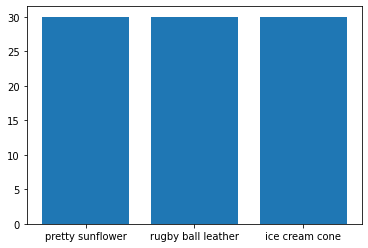

time: 165 ms


In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
# Split data into Training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=109)

time: 224 ms


Using 

# SUPPORT VECTOR MACHINES (SVM)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 36s


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 0])

time: 174 ms


In [ ]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 3.76 ms


# Creating **Confusion Matrix** on the predicted values

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc=accuracy_score(y_pred,y_test)
print(acc)
print("Confusion Matrix")
confusion_matrix(y_pred,y_test)

0.8888888888888888
Confusion Matrix


array([[8, 3, 0],
       [0, 8, 0],
       [0, 0, 8]])

time: 6.91 ms


In [34]:
# Saving the  model with the help of Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 56.6 ms


In [35]:
model = pickle.load(open('img_model.p','rb'))

time: 20.7 ms


Testing with a new image 

In [ ]:
# Testing a brand new Image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

Creating a web app using **STREAMLIT**

---







In [45]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok


     |████████████████████████████████| 133kB 5.7MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.26.2
    Uninstalling urllib3-1.26.2:
      Successfully uninstalled urllib3-1.26.2
time: 5.48 s


**DEPLOY**

In [64]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle 
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding', False)
st.title('Image Classifier -Ramcharan Teja')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image...", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['Ironman','Spiderman','Hulk']
    st.write('Result...')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')


Overwriting app.py
time: 18.2 ms


In [77]:
!streamlit run app.py &>/dev/null&

time: 121 ms


In [78]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'
time: 127 ms


In [79]:
!pgrep streamlit
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
public_url

482
551
566
581
598
631
648
667
734
838
853
866


<NgrokTunnel: "http://bae5f502cbf8.ngrok.io" -> "http://localhost:80">

time: 383 ms


In [76]:
ngrok.kill()

time: 18.3 ms
